In [528]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [529]:
!pip install statsmodels

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [530]:
import statsmodels.api as sm

In [531]:
!pip install fbprophet

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [532]:
from fbprophet import Prophet

In [533]:
df = pd.read_csv('data/squirrel.csv')
rf = pd.read_csv('data/rainfall.csv')
rsquir = pd.DataFrame(df[df['species'] == 'Sciurus vulgaris' ])

In [534]:
rsquir['year_parsed'] = pd.to_datetime(rsquir['year'], format = '%Y')


In [535]:
rsquir2 = pd.DataFrame(rsquir.groupby('year_parsed')['individualCount'].sum())
rsquir = rsquir[rsquir["year_parsed"].dt.year > 1990]
rsquir = rsquir[rsquir["year_parsed"].dt.year < 2020]

In [536]:
rsquir['year_parsed'] = rsquir['year_parsed'].dt.strftime('%Y')

In [537]:
df = pd.DataFrame(rsquir.groupby('year')["individualCount"].sum())
df.reset_index()

,year,individualCount
0,1991,311.0
1,1992,142.0
2,1993,324.0
3,1994,1091.0
4,1995,602.0
5,1996,937.0
6,1997,1358.0
7,1998,1016.0
8,1999,633.0
9,2000,817.0


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'No. of Red Squirrels observed')]

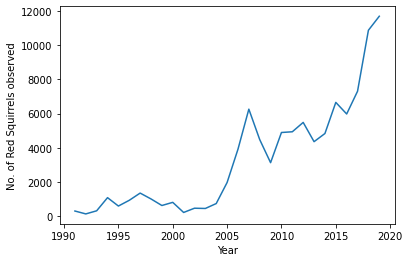

In [538]:
ax = sns.lineplot(x = "year", y = "individualCount", data=df)
ax.set(xlabel = "Year", ylabel="No. of Red Squirrels observed")

In [539]:
df.head()
df.reset_index(inplace = True)

In [540]:
df = df.rename(columns={"year": "ds", "individualCount":"y"})

In [541]:
df.dtypes

ds      int64
y     float64
dtype: object

In [542]:
df['ds'] = pd.to_datetime(df['ds'], format = '%Y')

In [543]:
df['ds'] = df['ds'].dt.strftime('%Y')

In [544]:
df.head()

,ds,y
0,1991,311.0
1,1992,142.0
2,1993,324.0
3,1994,1091.0
4,1995,602.0


In [545]:
df['ds'].dtypes

dtype('O')

In [546]:
rf.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1836,163.7,95.9,146.2,92.0,16.6,87.7,150.4,89.1,157.7,156.6,169.7,178.6,---,254.8,327.2,484.0,1504.1
1,1837,68.1,136.5,49.3,69.7,51.1,74.5,120.6,104.2,79.5,128.8,136.1,117.0,383.2,170.1,299.2,344.4,1135.3
2,1838,49.0,45.3,105.7,71.6,63.8,155.8,114.8,129.7,99.6,113.5,119.0,105.4,211.3,241.1,400.3,332.1,1173.3
3,1839,113.8,90.5,112.0,39.5,57.4,72.0,87.7,85.8,186.8,125.3,97.9,129.9,309.8,208.9,245.5,410.0,1198.7
4,1840,169.9,77.1,23.4,32.7,105.3,95.6,101.5,93.7,149.8,101.5,110.6,71.2,376.9,161.4,290.8,361.9,1132.3


In [547]:
rfann = pd.DataFrame(rf[rf["year"] >= 2000])

In [548]:
rfann = rfann.drop("jan", axis=1)
rfann = rfann.drop("feb", axis=1)
rfann = rfann.drop("mar", axis=1)
rfann = rfann.drop("apr", axis=1)
rfann = rfann.drop("may", axis=1)
rfann = rfann.drop("jun", axis=1)
rfann = rfann.drop("jul", axis=1)
rfann = rfann.drop("aug", axis=1)
rfann = rfann.drop("sep", axis=1)
rfann = rfann.drop("oct", axis=1)
rfann = rfann.drop("nov", axis=1)
rfann = rfann.drop("dec", axis=1)

In [549]:
rfann.head()

,year,win,spr,sum,aut,ann
164,2000,669.9,297.8,247.6,565.1,1700.3
165,2001,384.4,196.1,303.0,499.1,1308.1
166,2002,571.9,326.6,353.8,410.4,1620.7
167,2003,306.8,280.5,202.2,324.4,1207.2
168,2004,483.3,283.5,396.2,500.1,1687.9


In [550]:
rfann['year'] = pd.to_datetime(rfann['year'], format = '%Y')

In [551]:
rfann['year'] = rfann['year'].dt.strftime('%Y')

In [552]:
rfann.head()

,year,win,spr,sum,aut,ann
164,2000,669.9,297.8,247.6,565.1,1700.3
165,2001,384.4,196.1,303.0,499.1,1308.1
166,2002,571.9,326.6,353.8,410.4,1620.7
167,2003,306.8,280.5,202.2,324.4,1207.2
168,2004,483.3,283.5,396.2,500.1,1687.9


In [553]:
rfann = rfann.rename(columns={"year": "ds"})

In [554]:
rfann.dtypes

ds      object
win     object
spr    float64
sum    float64
aut    float64
ann    float64
dtype: object

In [555]:
df2 = df.merge(rfann, on = "ds", how="right")

In [556]:
df2.head()

,ds,y,win,spr,sum,aut,ann
0,2000,817.0,669.9,297.8,247.6,565.1,1700.3
1,2001,227.0,384.4,196.1,303.0,499.1,1308.1
2,2002,475.0,571.9,326.6,353.8,410.4,1620.7
3,2003,460.0,306.8,280.5,202.2,324.4,1207.2
4,2004,747.0,483.3,283.5,396.2,500.1,1687.9


In [557]:
#df2 = df2.drop('ann_x', axis=1)

In [558]:
df2.dropna(how="all")

,ds,y,win,spr,sum,aut,ann
0,2000,817.0,669.9,297.8,247.6,565.1,1700.3
1,2001,227.0,384.4,196.1,303.0,499.1,1308.1
2,2002,475.0,571.9,326.6,353.8,410.4,1620.7
3,2003,460.0,306.8,280.5,202.2,324.4,1207.2
4,2004,747.0,483.3,283.5,396.2,500.1,1687.9
5,2005,1976.0,541.5,350.6,287.3,494.3,1578.8
6,2006,3917.0,291,362.4,242.3,584.2,1644.0
7,2007,6256.0,633,322.0,382.2,357.6,1575.8
8,2008,4481.0,577.1,289.2,370.3,488.6,1717.8
9,2009,3133.0,383.4,349.5,425.7,554.2,1678.7


In [559]:
df2 = df2.dropna(axis = 0)
df2

,ds,y,win,spr,sum,aut,ann
0,2000,817.0,669.9,297.8,247.6,565.1,1700.3
1,2001,227.0,384.4,196.1,303.0,499.1,1308.1
2,2002,475.0,571.9,326.6,353.8,410.4,1620.7
3,2003,460.0,306.8,280.5,202.2,324.4,1207.2
4,2004,747.0,483.3,283.5,396.2,500.1,1687.9
5,2005,1976.0,541.5,350.6,287.3,494.3,1578.8
6,2006,3917.0,291,362.4,242.3,584.2,1644.0
7,2007,6256.0,633,322.0,382.2,357.6,1575.8
8,2008,4481.0,577.1,289.2,370.3,488.6,1717.8
9,2009,3133.0,383.4,349.5,425.7,554.2,1678.7


# Prophet model

In [560]:
m = Prophet()

In [561]:
#m.add_regressor('ann_y')

In [562]:
m.fit(df2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:fbprophet:n_changepoints greater than number of observations. Using 15.



Initial log joint probability = -55.9535
Iteration  1. Log joint probability =    13.6113. Improved by 69.5648.
Iteration  2. Log joint probability =    26.3504. Improved by 12.739.
Iteration  3. Log joint probability =    28.0933. Improved by 1.74296.
Iteration  4. Log joint probability =     31.418. Improved by 3.32472.
Iteration  5. Log joint probability =    32.3032. Improved by 0.885183.
Iteration  6. Log joint probability =    32.4594. Improved by 0.156187.
Iteration  7. Log joint probability =    32.7048. Improved by 0.245338.
Iteration  8. Log joint probability =    32.7605. Improved by 0.0557476.
Iteration  9. Log joint probability =    32.8079. Improved by 0.0473701.
Iteration 10. Log joint probability =    32.8904. Improved by 0.0825018.
Iteration 11. Log joint probability =    32.9234. Improved by 0.0330657.
Iteration 12. Log joint probability =    32.9482. Improved by 0.0247619.
Iteration 13. Log joint probability =     32.971. Improved by 0.0227527.
Iteration 14. Log joi

t probability =    32.9802. Improved by 0.00926937.
Iteration 15. Log joint probability =    33.1086. Improved by 0.128372.
Iteration 16. Log joint probability =    33.3106. Improved by 0.202035.
Iteration 17. Log joint probability =    33.3689. Improved by 0.0582761.
Iteration 18. Log joint probability =    33.4229. Improved by 0.0539811.
Iteration 19. Log joint probability =    33.4257. Improved by 0.0028347.
Iteration 20. Log joint probability =    33.4295. Improved by 0.0038135.
Iteration 21. Log joint probability =     33.444. Improved by 0.0144854.
Iteration 22. Log joint probability =    33.4449. Improved by 0.000858916.
Iteration 23. Log joint probability =    33.4508. Improved by 0.0059034.
Iteration 24. Log joint probability =    33.4517. Improved by 0.000965028.
Iteration 25. Log joint probability =    33.4562. Improved by 0.00447319.
Iteration 26. Log joint probability =    33.4572. Improved by 0.000985076.
Iteration 27. Log joint probability =    33.4575. Improved by 0.000

In [685]:
future = m.make_future_dataframe(periods = 2, freq = "YS")

In [686]:
future.head()

,ds
0,2000-01-01
1,2001-01-01
2,2002-01-01
3,2003-01-01
4,2004-01-01


In [565]:
forecast = m.predict(future)

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



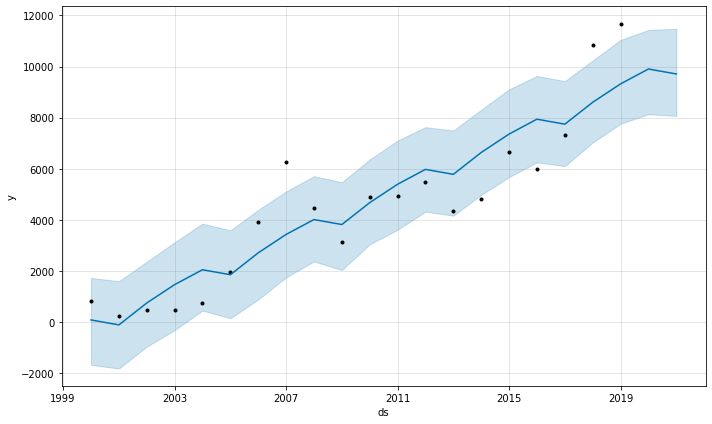

In [566]:
fig1 = m.plot(forecast)

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



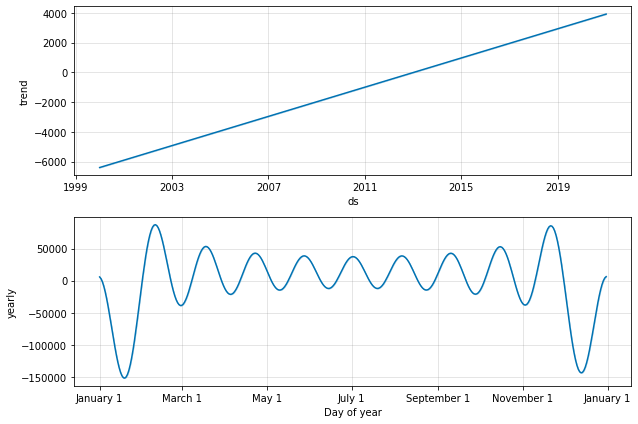

In [567]:
fig2 = m.plot_components(forecast)

In [568]:
nobs = 12
train = df2[:-nobs]
test = df2[-nobs:]

In [569]:
prophet = Prophet()
prophet.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:fbprophet:n_changepoints greater than number of observations. Using 5.



Initial log joint probability = -67.9845
Iteration  1. Log joint probability =    3.68511. Improved by 71.6696.
Iteration  2. Log joint probability =    8.43719. Improved by 4.75208.
Iteration  3. Log joint probability =    9.70408. Improved by 1.26689.
Iteration  4. Log joint probability =    9.75357. Improved by 0.0494916.
Iteration  5. Log joint probability =    9.77605. Improved by 0.0224794.
Iteration  6. Log joint probability =    9.78064. Improved by 0.00459375.
Iteration  7. Log joint probability =    9.78321. Improved by 0.00256342.
Iteration  8. Log joint probability =    9.78398. Improved by 0.00076867.
Iteration  9. Log joint probability =    9.78592. Improved by 0.00193888.
Iteration 10. Log joint probability =    9.78649. Improved by 0.000570903.
Iteration 11. Log joint probability =    9.78651. Improved by 1.94919e-05.
Iteration 12. Log joint probability =    9.78783. Improved by 0.00131932.
Iteration 13. Log joint probability =    9.78822. Improved by 0.000394265.
Iter

49. Improved by 0.000266789.
Iteration 15. Log joint probability =    9.78853. Improved by 3.91246e-05.
Iteration 16. Log joint probability =    9.78874. Improved by 0.00021905.
Iteration 17. Log joint probability =    9.78875. Improved by 7.33751e-06.
Iteration 18. Log joint probability =    9.78876. Improved by 9.87774e-06.
Iteration 19. Log joint probability =    9.78877. Improved by 4.11246e-06.
Iteration 20. Log joint probability =    9.78877. Improved by 3.85119e-06.
Iteration 21. Log joint probability =     9.7888. Improved by 2.5502e-05.
Iteration 22. Log joint probability =     9.7888. Improved by 5.48779e-06.
Iteration 23. Log joint probability =     9.7888. Improved by 2.40215e-06.
Iteration 24. Log joint probability =     9.7888. Improved by 4.32709e-07.
Iteration 25. Log joint probability =    9.78881. Improved by 2.83992e-06.
Iteration 26. Log joint probability =    9.78881. Improved by 1.53706e-07.
Iteration 27. Log joint probability =    9.78881. Improved by 3.61663e-07

In [570]:
futures = prophet.make_future_dataframe(periods=nobs, freq="YS")

In [571]:
forecast2 = prophet.predict(futures)

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



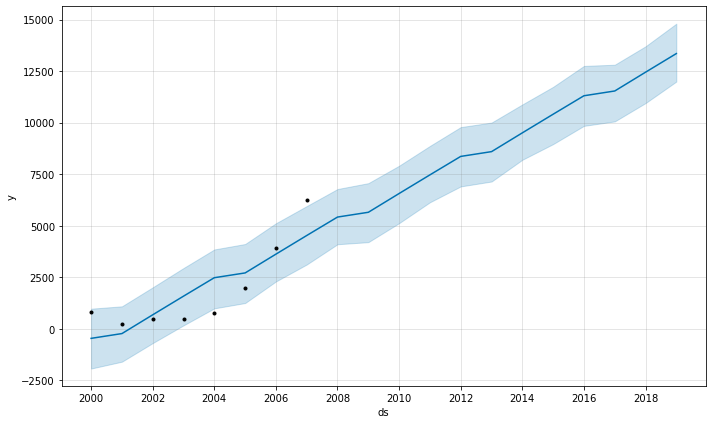

In [572]:
fig3 = prophet.plot(forecast2)

In [573]:
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,-413.436750,-1932.954816,973.119133,-413.436750,-413.436750,-54.078621,-54.078621,-54.078621,-54.078621,-54.078621,-54.078621,0.0,0.0,0.0,-467.515371
1,2001-01-01,323.976997,-1599.786257,1087.679359,323.976997,323.976997,-558.930535,-558.930535,-558.930535,-558.930535,-558.930535,-558.930535,0.0,0.0,0.0,-234.953537
2,2002-01-01,1059.375953,-696.018465,2009.789896,1059.375953,1059.375953,-382.626501,-382.626501,-382.626501,-382.626501,-382.626501,-382.626501,0.0,0.0,0.0,676.749452
3,2003-01-01,1794.774908,162.720990,2945.688225,1794.774908,1794.774908,-214.274067,-214.274067,-214.274067,-214.274067,-214.274067,-214.274067,0.0,0.0,0.0,1580.500842
4,2004-01-01,2530.173864,988.262008,3847.730030,2530.173864,2530.173864,-54.078621,-54.078621,-54.078621,-54.078621,-54.078621,-54.078621,0.0,0.0,0.0,2476.095243


In [574]:
from statsmodels.tools.eval_measures import rmse

In [575]:
test.head()

,ds,y,win,spr,sum,aut,ann
8,2008,4481.0,577.1,289.2,370.3,488.6,1717.8
9,2009,3133.0,383.4,349.5,425.7,554.2,1678.7
10,2010,4894.0,275.3,236.2,306.6,465.4,1244.2
11,2011,4937.0,362.3,369.9,360.9,569.4,1862.7
12,2012,5483.0,549.5,254.6,386.4,455.6,1596.2


In [576]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import pyplot

In [577]:
y_pred = forecast2[-nobs:]['yhat']
y_true = test['y']


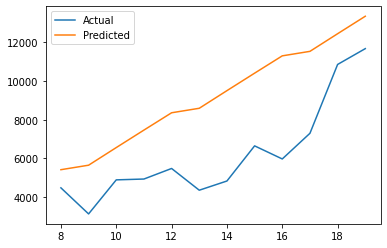

In [578]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [579]:
y_pred.head()

8     5419.705858
9     5652.267692
10    6563.970682
11    7467.722072
12    8363.316473
Name: yhat, dtype: float64

In [580]:
y_true.head()

8     4481.0
9     3133.0
10    4894.0
11    4937.0
12    5483.0
Name: y, dtype: float64

In [581]:
rmse(y_pred, y_true)

3295.8423115090477

In [582]:
from sklearn.metrics import mean_squared_error

In [583]:
mean_squared_error(y_true, y_pred, squared=True)



10862576.542333301

In [584]:
from sklearn.metrics import mean_absolute_percentage_error

In [585]:
mean_absolute_percentage_error(y_true, y_pred)

0.5548898944272611

In [586]:
rsquir.head()

,species,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,eventDate,day,month,year,year_parsed
1,Sciurus vulgaris,Scotland,PRESENT,1.0,d98506d8-5ab1-4a26-9ef1-766bdb54304f,55.186290,-3.045949,707.1,07/05/2014 00:00,7,5,2014,2014
3,Sciurus vulgaris,Scotland,PRESENT,1.0,d98506d8-5ab1-4a26-9ef1-766bdb54304f,56.781948,-3.864949,70.7,19/11/2013 00:00,19,11,2013,2013
5,Sciurus vulgaris,Scotland,PRESENT,1.0,d98506d8-5ab1-4a26-9ef1-766bdb54304f,55.055820,-4.983296,70.7,04/10/2008 00:00,4,10,2008,2008
12,Sciurus vulgaris,Scotland,PRESENT,1.0,d98506d8-5ab1-4a26-9ef1-766bdb54304f,57.414643,-2.213893,70.7,20/05/2009 00:00,20,5,2009,2009
15,Sciurus vulgaris,Scotland,PRESENT,1.0,d98506d8-5ab1-4a26-9ef1-766bdb54304f,54.879633,-3.732397,70.7,01/12/1999 00:00,1,12,1999,1999


In [587]:
red00s = rsquir[(rsquir['year'] >= 2000) & (rsquir['year'] < 2010)]
red10s = rsquir[(rsquir['year'] >= 2010) & (rsquir['year'] < 2020)]

In [588]:
redpivot00s = red00s.pivot_table(values = 'individualCount', index = 'month', aggfunc=[np.sum])
redpivot10s = red10s.pivot_table(values = 'individualCount', index = 'month', aggfunc=[np.sum])

In [589]:
redcount00 = redpivot00s.reset_index()
redcount10 = redpivot10s.reset_index()

In [591]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

fig = make_subplots(rows = 5, 
                    cols = 1, 
                    shared_xaxes=True,
                    vertical_spacing=0.05,
                    )

fig.append_trace(go.Scatter(
    mode = "lines+markers",
    x = months,
    y = [0, 0, 0, 10, 2, 39, 74, 54, 60, 0, 0, 0],
    name = "1970s"
), row = 1, col = 1,
                )

fig.append_trace(go.Scatter(
    mode = "lines+markers",
    x = months,
    y = [11, 6, 31, 40, 65, 83, 132, 30, 2, 5, 54, 38],
    name = '1980s'
), row = 2, col = 1)

fig.append_trace(go.Scatter(
    mode = "lines+markers",
    x = months,
    y = [0, 37, 136, 114, 211, 144, 65, 49, 9, 6, 4, 24],
    name = '1990s'
), row = 3, col = 1)

fig.append_trace(go.Scatter(
    mode = "lines+markers",
    x = months,
    y = [0, 43, 45, 125, 98, 64, 33, 56, 47, 17, 1, 1],
    name = '2000s'
), row = 4, col = 1)

fig.append_trace(go.Scatter(
    mode = "lines+markers",
    x = months,
    y = [11, 76, 21, 194, 170, 144, 141, 44, 34, 56, 19, 26],
    name = '2010s'
), row = 5, col = 1)

fig.update_xaxes(
        tickangle = 90,
        #title_text = "Month",
        title_font = {"size": 20},
        title_standoff = 25,
        )

fig.update_layout(
    title='Red Squirrel Observations by Month of Year, Split by Decade',
    xaxis_tickfont_size=14,
    yaxis=dict(
        #title='Number of Observations',
        titlefont_size=16,
        tickfont_size=14,
    ),

)

fig.update_yaxes(
    range = [0, 250])

fig.show()

In [602]:
test.dtypes

ds      object
y      float64
win     object
spr    float64
sum    float64
aut    float64
ann    float64
dtype: object

In [648]:
test.head()

,ds,y,win,spr,sum,aut,ann
8,2008,4481.0,577.1,289.2,370.3,488.6,1717.8
9,2009,3133.0,383.4,349.5,425.7,554.2,1678.7
10,2010,4894.0,275.3,236.2,306.6,465.4,1244.2
11,2011,4937.0,362.3,369.9,360.9,569.4,1862.7
12,2012,5483.0,549.5,254.6,386.4,455.6,1596.2


In [703]:
test.tail()

,ds,y,win,spr,sum,aut,ann
15,2015,6652.0,590.6,400.5,359.8,382.1,1840.1
16,2016,5975.0,739.3,261.3,345.1,321.2,1488.4
17,2017,7302.0,387.5,243.7,409.4,482.3,1522.9
18,2018,10862.0,426.2,232.5,252.2,498.7,1395.4
19,2019,11680.0,342.3,336.0,439.4,382.6,1558.9


In [649]:
test.isna().sum()

ds     0
y      0
win    0
spr    0
sum    0
aut    0
ann    0
dtype: int64

In [687]:
model = Prophet()
model.add_regressor('ann')
model.fit(test)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:fbprophet:n_changepoints greater than number of observations. Using 8.



Initial log joint probability = -67.7835
Iteration  1. Log joint probability =    8.59909. Improved by 76.3826.
Iteration  2. Log joint probability =     15.308. Improved by 6.70893.
Iteration  3. Log joint probability =    17.3883. Improved by 2.08027.
Iteration  4. Log joint probability =    19.7788. Improved by 2.39049.
Iteration  5. Log joint probability =    20.5471. Improved by 0.768299.
Iteration  6. Log joint probability =    20.5495. Improved by 0.00239462.
Iteration  7. Log joint probability =    20.6395. Improved by 0.0900177.
Iteration  8. Log joint probability =    20.8432. Improved by 0.203687.
Iteration  9. Log joint probability =    20.8605. Improved by 0.0173299.
Iteration 10. Log joint probability =    20.9078. Improved by 0.0473042.
Iteration 11. Log joint probability =    20.9155. Improved by 0.00771483.
Iteration 12. Log joint probability =    20.9166. Improved by 0.00108309.
Iteration 13. Log joint probability =    20.9258. Improved by 0.00923586.
Iteration 14. L

In [788]:
future = model.make_future_dataframe(periods=20, freq='YS')

In [789]:
future_dates = pd.date_range(start='2000', periods=20, freq='YS')

In [790]:
future = pd.DataFrame({'ds': future_dates})

In [791]:
future.tail()

,ds
15,2015-01-01
16,2016-01-01
17,2017-01-01
18,2018-01-01
19,2019-01-01


In [792]:
future['ann'] = test['ann']

In [793]:
future['ds'] = future['ds'].dt.strftime('%Y-%m')

In [794]:
future.head()

,ds,ann
0,2000-01,NaN
1,2001-01,NaN
2,2002-01,NaN
3,2003-01,NaN
4,2004-01,NaN


In [796]:
future.head()

,ds,ann
0,2000-01,1840.1
1,2001-01,1488.4
2,2002-01,1522.9
3,2003-01,1395.4
4,2004-01,NaN


In [797]:
future.isna().sum()

ds     0
ann    4
dtype: int64

In [798]:
forecast = model.predict(future)

ValueError: Found NaN in column 'ann'

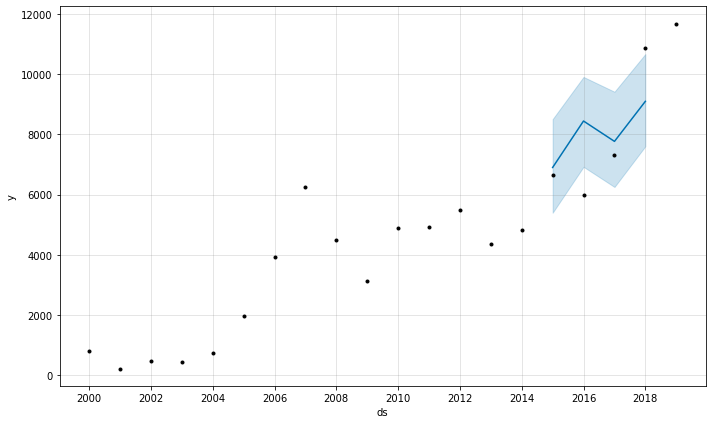

In [829]:
fig1 = m.plot(forecast)

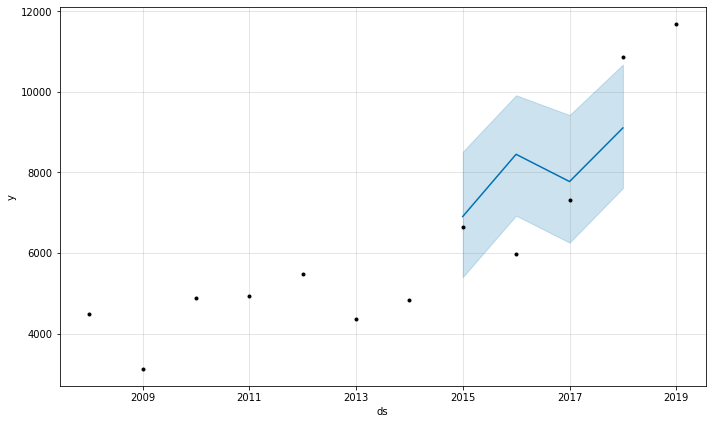

In [830]:
model.plot(forecast, uncertainty=True)
pyplot.show()

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



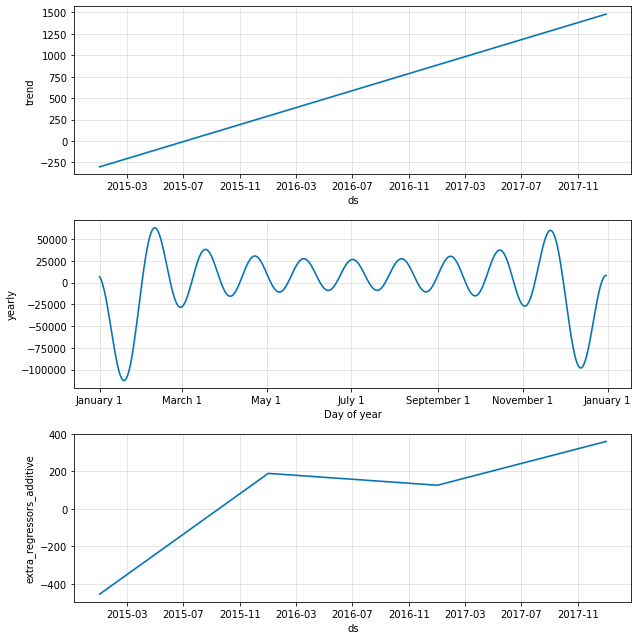

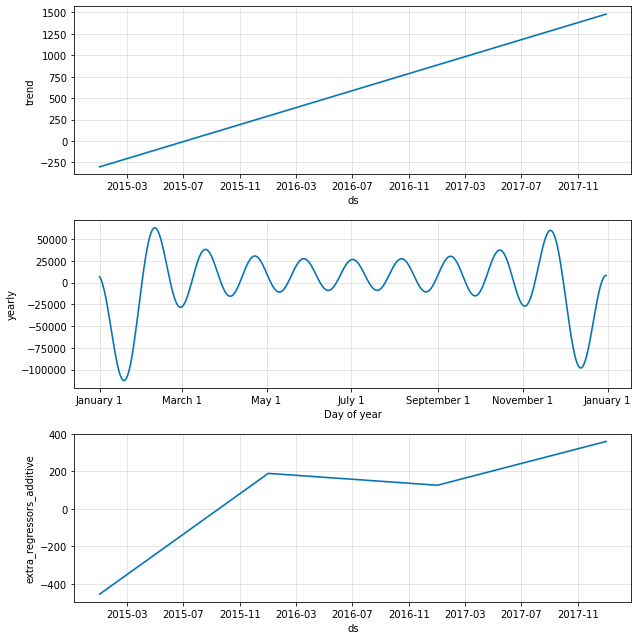

In [801]:
model.plot_components(forecast)

In [802]:
forecast.shape

(4, 22)

In [803]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,ann,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,-302.245935,5400.320279,8508.536978,-302.245935,-302.245935,7205.977811,7205.977811,7205.977811,-455.242684,...,-455.242684,-455.242684,-455.242684,7661.220495,7661.220495,7661.220495,0.0,0.0,0.0,6903.731876
1,2016-01-01,291.895827,6926.110574,9910.268364,291.895827,291.895827,8154.622664,8154.622664,8154.622664,189.880620,...,189.880620,189.880620,189.880620,7964.742044,7964.742044,7964.742044,0.0,0.0,0.0,8446.518491
2,2017-01-01,887.665375,6256.225703,9418.933159,887.665375,887.665375,6882.882977,6882.882977,6882.882977,126.597270,...,126.597270,126.597270,126.597270,6756.285707,6756.285707,6756.285707,0.0,0.0,0.0,7770.548353
3,2018-01-01,1481.807138,7608.589170,10671.830097,1481.807138,1481.807138,7618.707491,7618.707491,7618.707491,360.470518,...,360.470518,360.470518,360.470518,7258.236973,7258.236973,7258.236973,0.0,0.0,0.0,9100.514629


In [846]:
y_pred = forecast['yhat']
y_true = test['y']

In [847]:
forecast['yhat'].shape

(4,)

In [848]:
test['y'].shape

(12,)

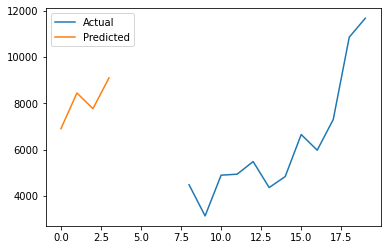

In [849]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()


In [804]:
test.tail()

,ds,y,win,spr,sum,aut,ann
15,2015,6652.0,590.6,400.5,359.8,382.1,1840.1
16,2016,5975.0,739.3,261.3,345.1,321.2,1488.4
17,2017,7302.0,387.5,243.7,409.4,482.3,1522.9
18,2018,10862.0,426.2,232.5,252.2,498.7,1395.4
19,2019,11680.0,342.3,336.0,439.4,382.6,1558.9


In [831]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,ann,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,-302.245935,5400.320279,8508.536978,-302.245935,-302.245935,7205.977811,7205.977811,7205.977811,-455.242684,...,-455.242684,-455.242684,-455.242684,7661.220495,7661.220495,7661.220495,0.0,0.0,0.0,6903.731876
1,2016-01-01,291.895827,6926.110574,9910.268364,291.895827,291.895827,8154.622664,8154.622664,8154.622664,189.880620,...,189.880620,189.880620,189.880620,7964.742044,7964.742044,7964.742044,0.0,0.0,0.0,8446.518491
2,2017-01-01,887.665375,6256.225703,9418.933159,887.665375,887.665375,6882.882977,6882.882977,6882.882977,126.597270,...,126.597270,126.597270,126.597270,6756.285707,6756.285707,6756.285707,0.0,0.0,0.0,7770.548353
3,2018-01-01,1481.807138,7608.589170,10671.830097,1481.807138,1481.807138,7618.707491,7618.707491,7618.707491,360.470518,...,360.470518,360.470518,360.470518,7258.236973,7258.236973,7258.236973,0.0,0.0,0.0,9100.514629


In [805]:
y_pred = forecast['yhat']
y_true = test[-4:]['y']

In [806]:
y_pred.head()

0    6903.731876
1    8446.518491
2    7770.548353
3    9100.514629
Name: yhat, dtype: float64

In [807]:
y_true.head()

16     5975.0
17     7302.0
18    10862.0
19    11680.0
Name: y, dtype: float64

In [808]:
rmse(y_pred, y_true)

2143.786576355476

In [809]:
from sklearn.metrics import mean_absolute_percentage_error

In [810]:
mean_absolute_percentage_error(y_true, y_pred)

0.20440867526068635

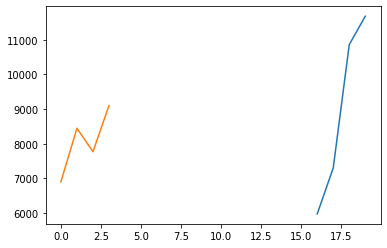

In [828]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')




In [826]:
y_true.max()

11680.0

In [816]:
y_pred.max()

9100.514629170375

In [821]:
y_true.min()

5975.0